<a href="https://colab.research.google.com/github/unknown-jun/NLP_study/blob/main/NLP_Book/B08_%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 임베딩
- **<span style="color: 2D3748; background-color:#fff5b1;">임베딩(embedding):</span>** 사람이 사용하는 언어(자연어)를 컴퓨터가 이해할 수 있는 언어(숫자) 형태인 벡터(vector)로 변환한 결과 혹은 일련의 과정을 의미함  

임베딩의 역할
- 단어 및 문장 간 관련성 계산
- 의미적 혹은 문법적 정보의 함축(왕-여왕, 교사-학생)



## 희소 표현 기반 임베딩
- **<span style="color: 2D3748; background-color:#fff5b1;">희소 표현(sparse representation)</span>**은 대부분 값이 0으로 채워져 있는 경우로, 대표적으로 **<span style="color: 2D3748; background-color:#fff5b1;">원-핫 인코딩</span>**이 있다.  
- 단어 $N$개를 각각 $N$차원의 벡터로 표현하는 방식으로 단어가 포함되어 있는 위치에 1을 넣고 나머지에는 0 값을 채워넣는 방식.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class2 = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080289/main/chap10/data/class2.csv')
label_encoding = LabelEncoder()
onehot_encoder = OneHotEncoder()

train_x = label_encoding.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

원-핫인코딩의 단점
1. 수학적인 의미에서 원-핫 벡터들은 하나의 요소만 1을 갖고 나머지는 모두 0인 **<span style="color: 2D3748; background-color:#fff5b1;">희소 벡터(sparse vector)</span>**를 갖는다.
  - 이때 두 단어에 대한 벡터의 내적(inner product)을 구해보면 0 값을 갖게 되므로 **<span style="color: 2D3748; background-color:#fff5b1;">직교(orthogonal)</span>**를 이룬다.
  - 즉, 단어끼리 관계성(유의어, 반의어)없이 서로 **<span style="color: 2D3748; background-color:#fff5b1;">독립적인</span>** 관계를 가진다.
2. **<span style="color: 2D3748; background-color:#fff5b1;">차원의 저주(curse of dimentionality)</span>** 문제가 발생한다.  

원-핫 인코딩에 대한 대안으로 워드투벡터(Word2Vec), 글로브(GloVe), 패스트텍스트(FastText)와 같이 신경망에 기반하여 단어를 벡터로 바꾸는 방법론이 주목받고 있다.

## 횟수 기반 임베딩
횟수 기반은 출현한 빈도를 고려하여 임베딩을 하는 방법, 대표적인 방식으로 TF-IDF가 있다.

### 카운터 벡터
- **<span style="color: 2D3748; background-color:#fff5b1;">카운터 벡터(counter vector)</span>**는 문자 집합에서 단어를 토큰으로 생성하고 각 단어의 출현 빈도수를 이용하여 인코딩해서 벡터로 만드는 방법
- 카운터 벡터는 사이킷런의 `CountVectorize()`를 사용하여 구현 가능하며 다음과 같은 작업을 수행한다.
  1. 문서를 토큰 리스트로 변환
  2. 각 문서에서 토큰의 출현 빈도를 센다.
  3. 각 문서를 인코딩하고 벡터로 변환

In [2]:
# 코퍼스에서 카운터 벡터 적용
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'and': 0,
 'any': 1,
 'chance': 2,
 'do': 3,
 'get': 4,
 'have': 5,
 'if': 6,
 'is': 7,
 'last': 8,
 'never': 9,
 'not': 10,
 'one': 11,
 'please': 12,
 'this': 13,
 'will': 14,
 'you': 15}

In [3]:
# 배열 변환
vect.transform(['you will never get chance, so do not miss your chance']).toarray()

array([[0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]])

In [4]:
# 불용어를 제거한 카운터 벡터
vect = CountVectorizer(stop_words=['and', 'is', 'please', 'this']).fit(corpus)
vect.vocabulary_

{'any': 0,
 'chance': 1,
 'do': 2,
 'get': 3,
 'have': 4,
 'if': 5,
 'last': 6,
 'never': 7,
 'not': 8,
 'one': 9,
 'will': 10,
 'you': 11}

### TF-IDF
**<span style="color: 2D3748; background-color:#fff5b1;">TF-IDF(Term Frequency-Inverse Document Frequency)</span>**는 정보 검색론에서 가중치를 구할때 사용되는 알고리즘  
- **<span style="color: 2D3748; background-color:#fff5b1;">TF(Term Frequence)</span>**은 문서 내에서 특정 단어가 출현한 빈도
  - '딥러닝 이대로 괜찮은가?'라는 기사에 "딥러닝"이라는 단어가 15번 출현했다면 이 문서의 TF는 15이다.
- **<span style="color: 2D3748; background-color:#fff5b1;">DF(Document Frequence)</span>**은 한 단어가 전체 문서에서 얼마나 공통적으로 등장하는지를 나타내는 값. 즉, 특정 단어가 나타난 문서 개수
  - 10개의 기사글에 '딥러닝'이라는 단어가 나온 기사는 2개다. 
  - '딥러닝 이대로 괜찮은가?'에서 15번 나왔지만 그것은 중요하지 않고 전체 기사글에서 '딥러닝'이라는 단어가 나온 기사 글의 갯수가 중요하다.
- 특정 단어 $t$가 모든 문서에 등장하는 일반적인 단어('a', 'the')라면 그것이 주는 정보량은 많지 않으므로 가중치를 낮추어 줄 필요가 있다.
- 따라서 DF가 클수록 TF-IDF의 가중치 값을 줄이기 위해 DF값에 역수를 취하는데 이 값이 **<span style="color: 2D3748; background-color:#fff5b1;">IDF</span>**이다.
- 역수를 취할 경우 전체 문서 개수가 많아질수록 IDF 값도 커지므로 로그$log$를 취해야 한다.
$$idf_t = log \frac{N}{df_t} = log\frac{\text{전체 문서 개수}}{\text{특정 단어 t가 포함된 문서 개수}}$$
- 전체 문서에서 특정 단어가 발생하는 빈도가 0이라면 분모가 0이 되기 때문에 이를 방지하기 위해 분모에 1을 더해준다. 이를 스무딩(smoothing)이라고 한다.
$$idf_t = log \frac{N}{1+ df_t } = log\frac{\text{전체 문서 개수}}{1+\text{특정 단어 t가 포함된 문서 개수 }}$$

TF-IDF는 다음과 같은 상황에서 사용한다.
- 키워드 검색을 기반으로 하는 검색 엔진
- 중요 키워드 분석
- 검색 엔진에서 검색 결과의 순위를 결정

##### 파이썬으로 tf-idf 직접 구현하기 

In [5]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

# 총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t, d) * idf(t)

In [6]:
result = []

# 각 문서에 대해 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [7]:
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [8]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


##### sklearn을 사용한 TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = ['I like machine learning', 'I love deep learning', ' I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), '행렬을 만들었습니다.')
doc_distance.toarray()

유사도를 위한 3 x 3 행렬을 만들었습니다.


array([[1.      , 0.224325, 0.      ],
       [0.224325, 1.      , 0.      ],
       [0.      , 0.      , 1.      ]])

## 예측 기반 임베딩
예측 기반 임베딩은 신경망 구조 혹은 모델을 이용하여 특정 문맥에서 어떤 단어가 나올지 예측하면서 단어를 벡터로 만드는 방식

### 워드투벡터
- **<span style="color: 2D3748; background-color:#fff5b1;">워드투벡터(Word2Vec)</span>**는 신경망 알고리즘으로, 주어진 텍스트에서 텍스트의 각 단어마다 하나씩 일련의 벡터를 출력한다.
- 워드투벡터의 출력 벡터가 2차원 그래프에 표시될 때, 의미론적으로 유사한 단어의 벡터는 서로 가깝게 표현 된다.
- 이때 '서로 가깝다'는 의미는 코사인 유사도를 이용하여 단어 간의 거리를 측정한 결과로 나타내는 관계성을 의미한다.
- 즉, 워드투벡터를 사용하면 특정 단어의 동의어를 찾을 수 있다.

워드투 벡터가 수행되는 과정
- 일정한 크기의 윈도우(window)로 분할된 텍스트를 신경망의 입력으로 사용
- 이때 모든 분할된 텍스트는 한 쌍의 대상 단어와 컨텍스트로 네트워크에 공급
- 아래 그림에서 대상단어가 'one'이라면 콘텍스트는 'and', 'I', 'love', 'this'로 구성
- 네트워크의 은닉층에는 각 단어에 대한 가중치가 포함되어 있다.

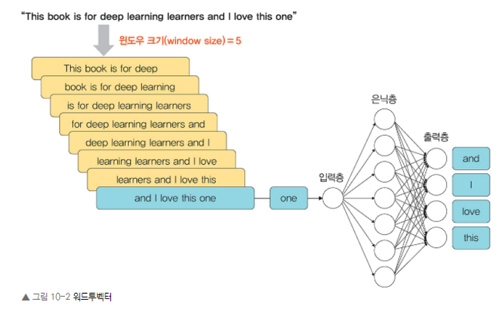

In [ ]:
!wget https://raw.githubusercontent.com/gilbutITbook/080289/main/chap10/data/peter.txt

import nltk
nltk.download("popular")

In [11]:
# 데이터셋을 메모리에 로딩하고 토큰화 적용
from nltk.tokenize import sent_tokenize, word_tokenize

import warnings
warnings.filterwarnings('ignore')

import gensim
from gensim.models import Word2Vec

sample = open('/content/peter.txt', 'r',encoding='UTF8')
s = sample.read()

f = s.replace("\n", ' ') # 줄바꿈을 공백으로 변환
data = []

for i in sent_tokenize(f):     # 로딩한 파일의 각 문장마다 반복
  temp = []
  for j in word_tokenize(i):   # 문장을 단어로 토큰화
    temp.append(j.lower())     # 토큰화된 단어를 소문자로 변환하여 temp에 저장
  data.append(temp)

data[:10]

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.']]

#### CBOW
- **<span style="color: 2D3748; background-color:#fff5b1;">CBOW(Continous Bag Of Words)</span>**는 단어를 여러 개 나열한 후 이와 관련된 단어를 추정하는 방식
- 문장에서 등장하는 $n$개의 단어 열에서 다음에 등장할 단어를 예측한다.
- 예를 들어 "calm cat slept on the sofa"라는 문장이 있을 때, "calm cat on the sofa"라는 문맥이 주어지면 "slept"를 예측하는 것

CBOW의 신경망은 다음과 같은 구조를 가진다.
- 각 문맥 단어를 은닉층으로 투사하는 가중치 행렬은 모든 단어에서 공통으로 사용된다. 
- 크기가 $N$의 은닉층을 가질때, 은닉층 크기 $N$은 입력 텍스트를 임베딩한 벡터 크기다.
- 입력층과 은닉층 사이의 가중치$W$는 $V × N$ 행렬이며, 은닉층에서 출력층 사이의 가중치 $W'$는 $N × V$행렬이다.
- V는 단어 집합의 크기
- 만약 원-핫 벡터의 차원이 7이고, $N$이 5라면 가중치 $W$는 7 $\times$ 5 행렬이고, $W'$는 5 $\times$ 7행렬이다.

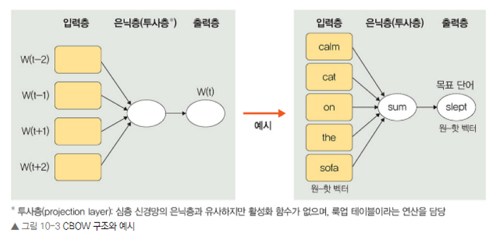


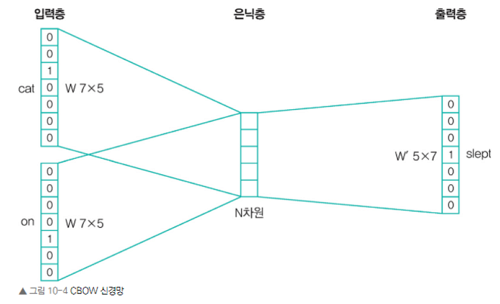

In [12]:
# 데이터셋에 CBOW 적용 후 'peter'와 'wendy'의 유사성 확인
model1 = gensim.models.Word2Vec(data, min_count=1, size=100, window=5, sg=0)

print('Cosine similarity between "peter" and "wendy" - CBOW: ', model1.wv.similarity('peter', 'wendy'))

Cosine similarity between "peter" and "wendy" - CBOW:  0.01931754


`gensim.models.Word2Vec(data, min_count=1, size=100, window=5, sg=0)`:

- 첫번째 파라미터: CBOW를 적용할 데이터셋
- min_count: 단어에 대한 최소 빈도수 제한(빈도가 적은 단어들은 학습하지 않음)
- size: 워드 벡터의 feature 값. 즉, 임베딩된 벡터의 차원
- window: 컨텍스트 윈도우 크기
- sg: sg가 0일 때는 CBOW를 의미하며, sg가 1일 때는 skip-gram을 나타낸다.



In [13]:
print('Cosine similarity between "peter" and "hook" - CBOW: ', model1.wv.similarity('peter', 'hook'))

Cosine similarity between "peter" and "hook" - CBOW:  0.12570374


#### skip-gram

- **<span style="color: 2D3748; background-color:#fff5b1;">skip-gram</span>**방식은 CBOW 방식과 반대로 특정한 단어에서 문맥이 될 수 있는 단어를 예측한다.
- 즉, skip-gram은 중심 단어에서 주변 단어를 예측하는 방식을 사용한다.
- 보통 입력 주변의 단어 $k$개를 문맥으로 보고 예측 모형을 만드는데, 이 $k$값을 윈도우 크기라고 한다.

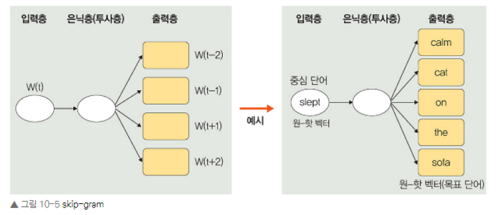

In [14]:
# 데이터셋에 skip-gram 적용 후 'peter'와 'wendy'의 유사성 확인
model2 = gensim.models.Word2Vec(data, min_count=1, size=100, window=5, sg=1)

print('Cosine similarity between "peter" and "wendy" - Skip Gram: ', model2.wv.similarity('peter', 'wendy'))

Cosine similarity between "peter" and "wendy" - Skip Gram:  0.33483267


In [15]:
print('Cosine similarity between "peter" and "hook" - Skip Gram: ', model2.wv.similarity('peter', 'hook'))

Cosine similarity between "peter" and "hook" - Skip Gram:  0.54274744


### FastText
- **<span style="color: 2D3748; background-color:#fff5b1;">FastText</span>**는 워드투벡터의 단점을 보완하고자 페이스북에서 개발한 임베딩 알고리즘
- 기존 워드투벡터는 분산 표현(distributed representation)을 이용하여 단어의 분산 분포가 유사한 단어들에 비슷한 벡터값을 할당해 표현함
- 따라서 자주 사용되지 않는 단어에 대해서는 학습이 불안정하다.
- FastText는 이러한 단점을 보완하기 위해 개발된 단어 표현(word representation) 방법을 사용한다.
- FastText는 노이즈에 강하며, 새로운 단어에 대해서는 형태적 유사성을 고려한 벡터 값을 얻기 때문에 자연어 처리에서 많이 사용되고 있다.

**<span style="color: 2D3748; background-color:#fff5b1;">FastText가 Word2Vec의 단점을 극복하는 방식</span>**
1. 사전에 없는 단어에 벡터 값을 부여하는 방식
  - FastText는 주어진 문서의 각 단어를 n-그램(n-gram)으로 표현
  - 이때 $n$의 설정에 따라 단어의 분리 수준이 결정된다.
  - $n$을 3으로 설정하면 "This is Deep Learning Book"은 'This is Deep', 'is Deep Learning', 'Deep Learning Book'으로 분리한 후 임베딩한다.  
  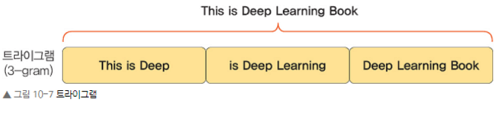
  - $n$값에 따른 단어의 분리(부분 단어(subword))는 다음과 같다.  
  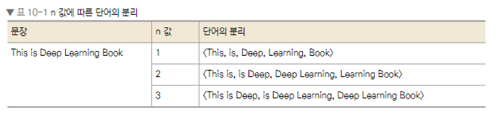
  - FastText는 인공신경망을 이용하여 학습이 완료된 후 데이터셋의 모든 단어를 각 n-그램에 대해 임베딩한다.
  - 따라서 사전에 없는 단어가 등장하면 n-그램으로 분리된 부분 단어와 유사도를 계산하여 의미를 유추할 수 있다.

2. 자주 사용되지 않는 단어에 학습 안정성을 확보하는 방법
  - Word2Vec은 단어의 출현빈도가 적으면 임베딩의 정확도가 낮은 단점이 있다.
  - 참고할 수 있는 경우의 수가 적기 때문에 상대적으로 정확도가 낮아 임베딩 되지 않는다.
  - 하지만 FastText는 등장 빈도수가 적더라도, n-그램으로 임베딩하기 때문에 참고할 수 있는 경우의 수가 많다.
  - 따라서 상대적으로 자주 사용되지 않는 단어에서도 정확도가 높다.

In [16]:
# 라이브러리 및 데이터 호출
from gensim.test.utils  import common_texts
from gensim.models.fasttext import FastText

stemmed = ['database', 'science', 'scientist', 'mgmt', 'microsoft', 'hire',\
           'develop', 'mentor', 'team', 'data', 'scientist', 'define', \
           'dataloader', 'scienc', 'priority', 'deep', 'understand', 'learn', \
           'goal', 'collabor', 'across', 'triple', 'group', 'set', 'team', \
           'shortterm', 'longterm', 'goal', 'act', 'strait', 'advisor', \
           'leadership', 'influenc', 'future', 'direct', 'strategy', 'define', \
           'partnership', 'align', 'effect', 'broad', 'analyt', 'effort', \
           'analyticsdata', 'team', 'drive', 'part', 'datadog', 'scienc', \
           'bi', 'common', 'disciplin', 'microsoftprior', 'experi', 'hire',\
           'manage', 'runner', 'team', 'data', 'scientist', 'busi', 'domain', \
           'experi', 'usage', 'analyt', 'must', 'experi', 'across', 'sever', \
           'relev', 'busi', 'domain', 'util', 'critic', 'think', 'skill', \
           'concept', 'complex', 'busi', 'problem', 'salt', 'use', 'advanc',\
           'analsis', 'large', 'scale', 'realworld', 'busi', 'data', 'set',\
           'candid', 'must', 'abl', 'independ', 'execut', 'analyt', 'project',\
           'help', 'intern', 'client', 'understand']

def gen_words(stemmed):
  yield stemmed

model = FastText(size=100, window=5, min_count=1, workers=4, sg=1)
model.build_vocab(gen_words(stemmed))

model.train(gen_words(stemmed), total_examples=model.corpus_count, 
            epochs=model.iter)
model.wv.most_similar(positive=['scientist'])

[('scienc', 0.40221747756004333),
 ('science', 0.35087889432907104),
 ('must', 0.3002471923828125),
 ('problem', 0.23477956652641296),
 ('part', 0.22043737769126892),
 ('experi', 0.1733037531375885),
 ('data', 0.1570461541414261),
 ('bi', 0.12951719760894775),
 ('direct', 0.1187698021531105),
 ('broad', 0.10711653530597687)]

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ko.vec

In [18]:
# 라이브러리와 사전 훈련된 모델 호출
from __future__ import print_function
from gensim.models import KeyedVectors  # gensim은 자연어를 벡터로 변환하는데 필요한 기능을 제공

model_kr = KeyedVectors.load_word2vec_format('/content/wiki.ko.vec')

In [19]:
# '노력'과 유사한 단어와 유사도 확인
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
  print("Word: {0}, Similarity: {1:.2f}".format(
                          similar_word[0], similar_word[1]
  ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


In [21]:
# '동물', '육식동물'에는 긍정적이지만 '사람'에는 부정적인 단어와 유사도 확인
similarties = model_kr.most_similar(positive=['동물','육식동물'], negative=['사람'])
similarties

[('초식동물', 0.7804122567176819),
 ('거대동물', 0.7547270059585571),
 ('육식동물의', 0.7547166347503662),
 ('유두동물', 0.7535113096237183),
 ('반추동물', 0.7470757961273193),
 ('독동물', 0.7466292381286621),
 ('육상동물', 0.746031641960144),
 ('유즐동물', 0.7450904846191406),
 ('극피동물', 0.7449344992637634),
 ('복모동물', 0.7424346208572388)]

## 횟수/예측 기반 임베딩

### 글로브
- **<span style="color: 2D3748; background-color:#fff5b1;">글로브(GloVe, Global Vectors for Word Representation)</span>**는 횟수 기반의 LSA(Latent Segmantic Analysis: 잠재 의미 분석)와 예측 기반의 Word2Vec의 단점을 보완하기 위한 모델
- 글로브는 단어에 대한 글로벌 동시 발생 확률(global co-occurrence statistics) 정보를 포함하는 단어 임베딩 방법
- 즉, 단어에 대한 통계 정보와 skip-gram을 합친 방식


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip /content/glove.6B.zip

In [33]:
# 라이브러리 호출 및 데이터셋 로딩
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# glove.6B.100d.txt는 수많은 단어에 대해 차원 100개를 가지는 임베딩 벡터를 제공함
glove_file = datapath('/content/glove.6B.100d.txt') 
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

`glove2word2vec(glove_file, word2vec_glove_file)`
- Gensim의 `glove2word2vec()` 함수를 사용하여 glove를 워드투벡터 형태로 변경할 수 있다. 이후부터는 변경된 형태를 이용하여 기존 워드투벡터의 함수를 사용할 수 있다.

1. 첫번째 인자: 글로브 입력 파일
2. 두번째 인자: 워드투벡터 출력 파일

즉, 글로브 데이터를 워드투벡터로 변환하겠다는 의미

In [34]:
# 'bill'과 유사한 단어의 리스트를 변환

# load_word2vec_format() 메서드를 이용하여 word2vec.c 형식으로 벡터를 가져옴
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
# 단어('bill') 기준으로 가장 유사한 단어들의 리스트를 보여줌
model.most_similar('bill')

[('legislation', 0.8072140216827393),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142540812492371),
 ('bills', 0.7044401168823242),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663139462471008)]

In [35]:
# cherry와 유사한 단어들의 리스트를 반환
model.most_similar('cherry')

[('peach', 0.688809871673584),
 ('mango', 0.6838189959526062),
 ('plum', 0.6684104204177856),
 ('berry', 0.6590359210968018),
 ('grove', 0.6581551432609558),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098617553711),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379213333129883)]

In [37]:
# cherry와 관련성이 없는 단어의 리스트를 반환
model.most_similar(negative=['cherry'])

[('kazushige', 0.4834350347518921),
 ('askerov', 0.4778186082839966),
 ('lakpa', 0.46915262937545776),
 ('ex-gay', 0.45713329315185547),
 ('tadayoshi', 0.4522106647491455),
 ('turani', 0.4481006860733032),
 ('saglam', 0.446959912776947),
 ('aijun', 0.4435269832611084),
 ('adjustors', 0.44235295057296753),
 ('nyum', 0.4423118233680725)]

In [38]:
# 'woman','king'과 유사성이 높으면서 'man'과 관련성이 없는 단어를 반환
result = model.most_similar(positive=['woman','king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [39]:
# 'australia', 'beer','france'와 관련성이 있는 단어를 반환
def analogy(x1, x2, y1):
  result = model.most_similar(positive=[y1, x2], negative=[x1])
  return result[0][0]

analogy('australia', 'beer','france')

'champagne'

In [40]:
# 'tall','tallest','long' 단어를 기반으로 새로운 단어 유추
analogy('tall','tallest','long')

'longest'

In [41]:
# 'breakfast cereal dinner lunch' 중 유사도가 낮은 단어를 반환
print(model.doesnt_match('breakfast cereal dinner lunch'.split()))

cereal
